In [13]:
# -*- coding: utf-8 -*-

import os
import numpy as np 
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
from glob import glob
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import cv2
import matplotlib.pyplot as plt
import random
import os
import numpy as np
width=50
height=50
#Reading the input images
files=os.listdir('/content/leaves/')
def p_check(mask,start_x,start_y):
    #Selecting patches only from the leaf is present (i.e. not the background)
    ROI=mask[start_x:start_x+width,start_y:start_y+height]
    #Calculating percentage of whiteness
    if(np.sum(ROI==255)/(ROI.shape[0]*ROI.shape[1])>0.7):
        return True
    else:
        return False
for i in range(0,len(files)):
    image=cv2.imread('/content/leaves/'+files[i])
    hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)[:,:,2]
    ret,image_result = cv2.threshold(hsv,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
    image_result= cv2.morphologyEx(image_result, cv2.MORPH_DILATE, kernel, )

    contours = cv2.findContours(image_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    c = max(contours, key = cv2.contourArea)
    start_x=random.randint(0,image.shape[0]-50)
    start_y=random.randint(0,image.shape[1]-50)
    while(not p_check(image_result,start_x,start_y)):
        start_x=random.randint(0,image.shape[0]-50)
        start_y=random.randint(0,image.shape[1]-50)
        
    else:
        ROI=image[start_x:start_x+width,start_y:start_y+height]
     # Writing the patches obtained to a file   
    cv2.imwrite('content/patches/'+str(i+1)+'.png',ROI)
    

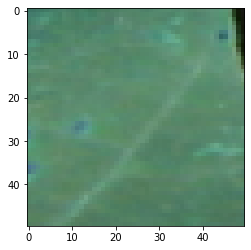

In [30]:
plt.imshow(ROI)